In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [7]:
data = pd.read_csv('data.csv')
data

/Users/ikeraguirreotaegui/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1,20,60,119,130,131,132,135,136,137,140,146,147,148) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,0,112435993,NaN,2300.0,2300.0,2300.0,36 months,12.62%,77.08,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1,112290210,NaN,16000.0,16000.0,16000.0,60 months,12.62%,360.95,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,2,112436985,NaN,6025.0,6025.0,6025.0,36 months,15.05%,209.01,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,3,112439006,NaN,20400.0,20400.0,20400.0,36 months,9.44%,652.91,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,4,112438929,NaN,13000.0,13000.0,13000.0,36 months,11.99%,431.73,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884879,421092,36271333,NaN,13000.0,13000.0,13000.0,60 months,15.99%,316.07,D,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
884880,421093,36490806,NaN,12000.0,12000.0,12000.0,60 months,19.99%,317.86,E,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
884881,421094,36271262,NaN,20000.0,20000.0,20000.0,36 months,11.99%,664.20,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
884882,421095,Total amount funded in policy code 1: 6417608175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Target variable

As we have said, the purpuse of this work is to be able to distinguish between potential defaults and clients that will pay the full loan without any short of late payment. First of all, we are going to explore the variable itself, and how many categories it is composed by.

In [8]:
data.loan_status.unique()

array(['Current', 'Fully Paid', 'In Grace Period', 'Late (31-120 days)',
       'Late (16-30 days)', 'Charged Off', 'Default', nan], dtype=object)

There are 2 changes that need to be made in teh variable:
    
1. We are not interested in loans with the "Current" status, as we don't know if either they are going to be fully paid or if some late payments might occur. 

2. Any late payment will be considered a default.

From now on, all fully-paid loans will be represented with the value "1", whereas the rest will have a "0" on them.

In [9]:
def target_transformation(dataset):
    dataset = dataset[dataset.loan_status!= 'Current']
    dataset.loan_status.replace(['Fully Paid', 
                                 'In Grace Period', 
                                 'Late (31-120 days)',
                                 'Late (16-30 days)', 
                                 'Charged Off', 
                                 'Default'], 
                                 [1, 0, 0, 0, 0, 0], inplace = True)
    return dataset

In [10]:
data2 = target_transformation(data)

/Users/ikeraguirreotaegui/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [11]:
data2.loan_status.unique()

array([ 1.,  0., nan])

# 4. Feature selection.

We are going to select which variables should stay in the dataset. 

First of all, columns with more than a 35,5% of NaN values will be deleted

In [12]:
def na_filter(dataset):
    remove = set()
    na_total = dataset.isnull().sum()
    filas = len(dataset.index)
    z = filas * 0.355
    for i in na_total.index:
        if (na_total[i]>z):
            remove.add(i)
    for i in remove:
        dataset.drop(i, axis=1, inplace=True)
    return dataset

In [13]:
data3 = na_filter(data2)

/Users/ikeraguirreotaegui/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
data3

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
8,8,112038251,11575.0,11575.0,11575.0,36 months,7.35%,359.26,A,A4,...,11.1,1.0,0.0,528172.0,100865.0,28100.0,120572.0,N,Cash,N
10,10,112149045,7200.0,7200.0,7200.0,36 months,24.85%,285.70,E,E3,...,100.0,0.0,0.0,7600.0,5588.0,3600.0,4000.0,N,Cash,N
24,24,112052261,7500.0,7500.0,7500.0,36 months,7.35%,232.79,A,A4,...,8.3,0.0,0.0,350617.0,45955.0,83700.0,32239.0,N,Cash,N
42,42,111999259,10000.0,10000.0,10000.0,60 months,16.02%,243.29,C,C5,...,0.0,2.0,0.0,34200.0,10956.0,18800.0,5500.0,N,Cash,N
91,91,111808508,14000.0,14000.0,14000.0,36 months,16.02%,492.34,C,C5,...,100.0,0.0,0.0,170591.0,27684.0,3000.0,30321.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884879,421092,36271333,13000.0,13000.0,13000.0,60 months,15.99%,316.07,D,D2,...,50.0,1.0,0.0,51239.0,34178.0,10600.0,33239.0,N,Cash,N
884880,421093,36490806,12000.0,12000.0,12000.0,60 months,19.99%,317.86,E,E3,...,66.7,0.0,0.0,96919.0,58418.0,9700.0,69919.0,N,Cash,N
884881,421094,36271262,20000.0,20000.0,20000.0,36 months,11.99%,664.20,B,B5,...,50.0,0.0,1.0,43740.0,33307.0,41700.0,0.0,N,Cash,N
884882,421095,Total amount funded in policy code 1: 6417608175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see, more than 50 variables have been removed from the dataset. 

Now, we are going to delete some variables with Business-knowledge crieria, this is, variables that we consider that have no impact whatsoever in the outcome of the payment of any loan, or that maybe they are explicitly included in other variables.

In [15]:
def bl_filter(dataset):  
    dataset.drop(['addr_state', 
                  'collection_recovery_fee', 
                  'collections_12_mths_ex_med',
                  'earliest_cr_line',
                  'emp_title',
                  'grade',
                  'id',
                  'issue_d',
                  'last_credit_pull_d',
                  'last_pymnt_d',
                  'num_tl_120dpd_2m',
                  'num_tl_30dpd',
                  'purpose',
                  'recoveries',
                  'sub_grade',
                  'term',
                  'url',
                  'zip_code',
                  'disbursement_method',
                  'emp_length',
                  'title'],
                 axis = 1,
                 inplace = True)
    return dataset

In [16]:
bl_filter(data3)

/Users/ikeraguirreotaegui/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
8,8,11575.0,11575.0,11575.0,7.35%,359.26,OWN,153000.0,Not Verified,1.0,...,95.7,11.1,1.0,0.0,528172.0,100865.0,28100.0,120572.0,N,N
10,10,7200.0,7200.0,7200.0,24.85%,285.70,RENT,50000.0,Source Verified,1.0,...,80.0,100.0,0.0,0.0,7600.0,5588.0,3600.0,4000.0,N,N
24,24,7500.0,7500.0,7500.0,7.35%,232.79,MORTGAGE,110000.0,Not Verified,1.0,...,100.0,8.3,0.0,0.0,350617.0,45955.0,83700.0,32239.0,N,N
42,42,10000.0,10000.0,10000.0,16.02%,243.29,RENT,51979.0,Source Verified,1.0,...,100.0,0.0,2.0,0.0,34200.0,10956.0,18800.0,5500.0,N,N
91,91,14000.0,14000.0,14000.0,16.02%,492.34,MORTGAGE,75000.0,Verified,1.0,...,90.0,100.0,0.0,0.0,170591.0,27684.0,3000.0,30321.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884879,421092,13000.0,13000.0,13000.0,15.99%,316.07,RENT,35000.0,Verified,0.0,...,100.0,50.0,1.0,0.0,51239.0,34178.0,10600.0,33239.0,N,N
884880,421093,12000.0,12000.0,12000.0,19.99%,317.86,RENT,64400.0,Source Verified,0.0,...,95.0,66.7,0.0,0.0,96919.0,58418.0,9700.0,69919.0,N,N
884881,421094,20000.0,20000.0,20000.0,11.99%,664.20,RENT,100000.0,Verified,1.0,...,100.0,50.0,0.0,1.0,43740.0,33307.0,41700.0,0.0,N,N
884882,421095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
data3.isna().sum()

Unnamed: 0                    0
loan_amnt                     8
funded_amnt                   8
funded_amnt_inv               8
int_rate                      8
                             ..
total_bal_ex_mort             8
total_bc_limit                8
total_il_high_credit_limit    8
hardship_flag                 8
debt_settlement_flag          8
Length: 73, dtype: int64

In [18]:
data3.shape

(462199, 73)

In [19]:
data4 = data3.dropna()

# 4. Encoding

There are some categorical variables that we are going to transform into numeric.

In [20]:
types = data4.dtypes
types_2 = pd.DataFrame(types)

In [21]:
objects = types_2[types_2[0]=='object']
objects

,0
int_rate,object
home_ownership,object
verification_status,object
pymnt_plan,object
revol_util,object
initial_list_status,object
application_type,object
hardship_flag,object
debt_settlement_flag,object


In [22]:
data4.int_rate.unique()

array(['  7.35%', ' 24.85%', ' 16.02%', ' 30.79%', ' 20.00%', ' 11.99%',
       ' 18.06%', ' 10.91%', ' 10.42%', '  9.44%', ' 15.05%', ' 21.45%',
       '  9.93%', ' 30.65%', ' 13.59%', ' 23.88%', '  5.32%', ' 25.82%',
       ' 14.08%', ' 19.03%', ' 26.30%', ' 17.09%', ' 30.17%', '  7.21%',
       ' 12.62%', '  7.97%', ' 30.75%', '  7.07%', ' 30.84%', ' 29.69%',
       ' 30.94%', ' 22.91%', ' 30.89%', ' 30.99%', ' 28.72%', ' 13.49%',
       ' 12.74%', ' 15.99%', ' 14.99%', ' 11.44%', ' 24.74%', ' 28.69%',
       '  7.49%', ' 29.99%', ' 13.99%', ' 10.49%', ' 19.99%', ' 18.99%',
       '  8.24%', ' 11.49%', ' 17.99%', ' 16.99%', ' 26.24%', ' 30.49%',
       ' 23.99%', ' 25.49%', ' 11.39%', ' 21.49%', ' 22.74%', '  7.99%',
       '  6.99%', ' 30.74%', '  7.24%', ' 29.49%', '  6.00%', ' 15.59%',
       ' 13.66%', ' 14.31%', ' 17.86%', ' 12.39%', ' 12.99%', '  9.49%',
       '  8.67%', '  8.19%', ' 16.49%', ' 21.99%', ' 22.99%', ' 17.14%',
       ' 19.24%', ' 18.54%', ' 25.83%', ' 25.80%', 

In [23]:
data4.home_ownership.unique()

array(['OWN', 'RENT', 'MORTGAGE', 'ANY'], dtype=object)

In [24]:
data4.verification_status.unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [25]:
data4.pymnt_plan.unique()

array(['n', 'y'], dtype=object)

In [26]:
data4.revol_util.unique()

array(['22.7%', '98.9%', '27.2%', ..., '123.3%', '121.4%', '106.8%'],
      dtype=object)

In [27]:
data4.initial_list_status.unique()

array(['w', 'f'], dtype=object)

In [28]:
data4.application_type.unique()

array(['Individual', 'Joint App'], dtype=object)

In [29]:
data4.hardship_flag.unique()

array(['N', 'Y'], dtype=object)

In [30]:
data4.debt_settlement_flag.unique()

array(['N', 'Y'], dtype=object)

Two changes need to be made in this dataset:
    
1. "int_rate" and "revol_util" will be converted into numeric, with no porcentages

2. The rest of variables will get dummied, as we consider that their categories are very well defined and any of them exceed 5 or more categories

In [31]:
data4['int_rate'] = data4['int_rate'].str.rstrip('%').astype('float') / 100.0

<ipython-input-31-278ec4f35b47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['int_rate'] = data4['int_rate'].str.rstrip('%').astype('float') / 100.0


In [32]:
data4.int_rate.unique()

array([0.0735, 0.2485, 0.1602, 0.3079, 0.2   , 0.1199, 0.1806, 0.1091,
       0.1042, 0.0944, 0.1505, 0.2145, 0.0993, 0.3065, 0.1359, 0.2388,
       0.0532, 0.2582, 0.1408, 0.1903, 0.263 , 0.1709, 0.3017, 0.0721,
       0.1262, 0.0797, 0.3075, 0.0707, 0.3084, 0.2969, 0.3094, 0.2291,
       0.3089, 0.3099, 0.2872, 0.1349, 0.1274, 0.1599, 0.1499, 0.1144,
       0.2474, 0.2869, 0.0749, 0.2999, 0.1399, 0.1049, 0.1999, 0.1899,
       0.0824, 0.1149, 0.1799, 0.1699, 0.2624, 0.3049, 0.2399, 0.2549,
       0.1139, 0.2149, 0.2274, 0.0799, 0.0699, 0.3074, 0.0724, 0.2949,
       0.06  , 0.1559, 0.1366, 0.1431, 0.1786, 0.1239, 0.1299, 0.0949,
       0.0867, 0.0819, 0.1649, 0.2199, 0.2299, 0.1714, 0.1924, 0.1854,
       0.2583, 0.258 , 0.245 , 0.0649, 0.2589, 0.0603, 0.2099, 0.2499,
       0.2599, 0.2557, 0.2606, 0.1757, 0.1449, 0.1249, 0.1629, 0.1015,
       0.0839, 0.2343, 0.1561, 0.1398, 0.1824, 0.0917, 0.0769, 0.1099,
       0.1952, 0.1167, 0.1335, 0.2215, 0.0712, 0.202 , 0.2408, 0.2118,
      

In [33]:
data4['revol_util'] = data4['revol_util'].str.rstrip('%').astype('float') / 100.0

<ipython-input-33-0b227b6ba605>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['revol_util'] = data4['revol_util'].str.rstrip('%').astype('float') / 100.0


In [34]:
data4.revol_util.unique()

array([0.227, 0.989, 0.272, ..., 1.233, 1.214, 1.068])

In [35]:
data5 = pd.get_dummies(data4,
                       columns = ['home_ownership',
                                  'verification_status',
                                  'pymnt_plan',
                                  'initial_list_status',
                                  'application_type',
                                  'hardship_flag',
                                  'debt_settlement_flag'],
                       drop_first = True)
data5

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,...,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,initial_list_status_w,application_type_Joint App,hardship_flag_Y,debt_settlement_flag_Y
8,8,11575.0,11575.0,11575.0,0.0735,359.26,153000.0,1.0,16.99,0.0,...,0,1,0,0,0,0,1,0,0,0
10,10,7200.0,7200.0,7200.0,0.2485,285.70,50000.0,1.0,6.07,0.0,...,0,0,1,1,0,0,1,0,0,0
24,24,7500.0,7500.0,7500.0,0.0735,232.79,110000.0,1.0,13.12,0.0,...,1,0,0,0,0,0,1,0,0,0
42,42,10000.0,10000.0,10000.0,0.1602,243.29,51979.0,1.0,10.11,0.0,...,0,0,1,1,0,0,1,0,0,0
91,91,14000.0,14000.0,14000.0,0.1602,492.34,75000.0,1.0,10.86,1.0,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884875,421088,11575.0,11575.0,11575.0,0.1559,404.61,25400.0,1.0,27.08,0.0,...,0,0,1,0,1,0,0,0,0,0
884876,421089,12000.0,12000.0,12000.0,0.1199,398.52,63000.0,0.0,23.69,1.0,...,1,0,0,0,1,0,0,0,0,0
884879,421092,13000.0,13000.0,13000.0,0.1599,316.07,35000.0,0.0,30.90,0.0,...,0,0,1,0,1,0,1,0,0,0
884880,421093,12000.0,12000.0,12000.0,0.1999,317.86,64400.0,0.0,27.19,1.0,...,0,0,1,1,0,0,1,0,0,0


# 5. Highly correlated features.

In [36]:
data5.corr()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,...,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,initial_list_status_w,application_type_Joint App,hardship_flag_Y,debt_settlement_flag_Y
Unnamed: 0,1.000000,0.023025,0.023025,0.023099,-0.001666,0.016179,-0.004498,-0.027455,0.007707,-0.003525,...,-0.004577,-0.006289,0.008609,0.022728,0.007094,-0.001275,-0.107403,-0.058811,-0.002935,0.017586
loan_amnt,0.023025,1.000000,1.000000,0.999995,0.141352,0.951008,0.329747,-0.067476,0.009633,-0.007918,...,0.180910,-0.016889,-0.175212,0.071540,0.183738,0.008716,0.055643,0.034144,0.010797,0.010942
funded_amnt,0.023025,1.000000,1.000000,0.999995,0.141352,0.951008,0.329747,-0.067476,0.009633,-0.007918,...,0.180910,-0.016889,-0.175212,0.071540,0.183738,0.008716,0.055643,0.034144,0.010797,0.010942
funded_amnt_inv,0.023099,0.999995,0.999995,1.000000,0.141236,0.950991,0.329794,-0.067401,0.009537,-0.007941,...,0.180936,-0.016898,-0.175233,0.071551,0.183683,0.008721,0.056230,0.034142,0.010801,0.010906
int_rate,-0.001666,0.141352,0.141352,0.141236,1.000000,0.132658,-0.083467,-0.268433,0.171644,0.049004,...,-0.064081,0.010768,0.059095,0.019821,0.201794,0.010324,-0.094270,0.037932,0.013264,0.047594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pymnt_plan_y,-0.001275,0.008716,0.008716,0.008721,0.010324,0.007450,-0.001118,-0.049718,0.008510,0.005237,...,-0.004311,0.002987,0.002572,0.000466,0.004742,1.000000,0.004540,0.001107,0.855476,-0.004050
initial_list_status_w,-0.107403,0.055643,0.055643,0.056230,-0.094270,-0.000225,0.027221,-0.004413,-0.012074,-0.011484,...,0.031834,-0.000849,-0.032149,0.021491,-0.031122,0.004540,1.000000,0.022146,0.004927,-0.010423
application_type_Joint App,-0.058811,0.034144,0.034144,0.034142,0.037932,0.034682,-0.018760,-0.025248,0.098371,0.001327,...,0.019896,-0.002535,-0.018849,-0.011855,0.015884,0.001107,0.022146,1.000000,0.000403,-0.007009
hardship_flag_Y,-0.002935,0.010797,0.010797,0.010801,0.013264,0.008841,-0.000464,-0.058117,0.008623,0.005249,...,-0.004409,0.001144,0.003816,0.001013,0.005883,0.855476,0.004927,0.000403,1.000000,-0.004734


We are dropping highly correlated features, this is, independent variables with high correlations between them:

1. (0.8 to 1)

2. (-0.8 to -1)

In [38]:
def correlation(dataset, threshold):
    corr_columns = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                corr_columns.add(colname)
    return corr_columns

In [39]:
corr_data = correlation(data5, 0.8)
corr_data

{'avg_cur_bal',
 'bc_util',
 'fico_range_high',
 'funded_amnt',
 'funded_amnt_inv',
 'hardship_flag_Y',
 'home_ownership_RENT',
 'installment',
 'last_fico_range_low',
 'num_bc_sats',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'out_prncp_inv',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rev_hi_lim'}

In [40]:
data6 = data5.drop(corr_data, axis = 1)
data6

,Unnamed: 0,loan_amnt,int_rate,annual_inc,loan_status,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,...,tax_liens,total_bal_ex_mort,home_ownership_MORTGAGE,home_ownership_OWN,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,initial_list_status_w,application_type_Joint App,debt_settlement_flag_Y
8,8,11575.0,0.0735,153000.0,1.0,16.99,0.0,720.0,0.0,20.0,...,0.0,100865.0,0,1,0,0,0,1,0,0
10,10,7200.0,0.2485,50000.0,1.0,6.07,0.0,685.0,0.0,4.0,...,0.0,5588.0,0,0,1,0,0,1,0,0
24,24,7500.0,0.0735,110000.0,1.0,13.12,0.0,710.0,2.0,19.0,...,0.0,45955.0,1,0,0,0,0,1,0,0
42,42,10000.0,0.1602,51979.0,1.0,10.11,0.0,690.0,0.0,15.0,...,0.0,10956.0,0,0,1,0,0,1,0,0
91,91,14000.0,0.1602,75000.0,1.0,10.86,1.0,685.0,0.0,4.0,...,0.0,27684.0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884875,421088,11575.0,0.1559,25400.0,1.0,27.08,0.0,680.0,0.0,9.0,...,0.0,19798.0,0,0,0,1,0,0,0,0
884876,421089,12000.0,0.1199,63000.0,0.0,23.69,1.0,685.0,0.0,13.0,...,0.0,112990.0,1,0,0,1,0,0,0,0
884879,421092,13000.0,0.1599,35000.0,0.0,30.90,0.0,680.0,0.0,9.0,...,0.0,34178.0,0,0,0,1,0,1,0,0
884880,421093,12000.0,0.1999,64400.0,0.0,27.19,1.0,695.0,2.0,17.0,...,0.0,58418.0,0,0,1,0,0,1,0,0


In [42]:
corr1 = data6[data6.columns[0:16]].corr()

In [43]:
corr2 = data6[data6.columns[17:32]].corr()

In [44]:
corr3 = data6[data6.columns[33:52]].corr()

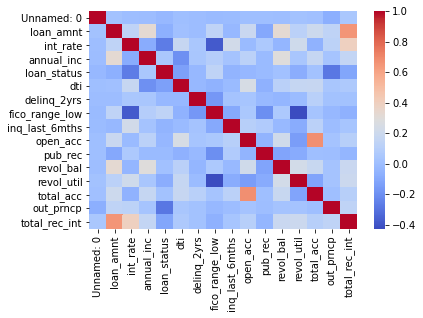

In [45]:
sns.heatmap(corr1, cmap = 'coolwarm')

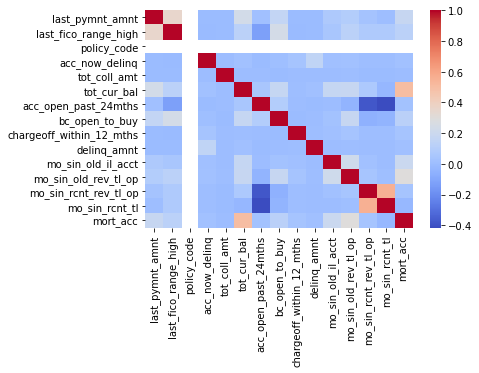

In [46]:
sns.heatmap(corr2, cmap = 'coolwarm')

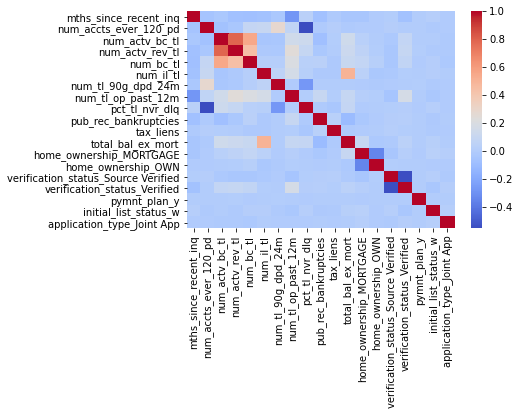

In [47]:
sns.heatmap(corr3, cmap = 'coolwarm')

In [48]:
data6.to_csv('loan_clean.csv')